In [96]:

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [97]:
import numpy as np
import matplotlib.pyplot as plt
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [98]:
X = mnist.data[::50, :]
y = mnist.target[::50]

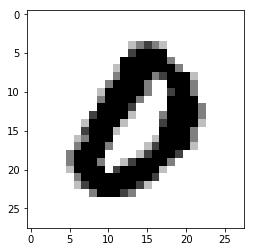

In [101]:
#affichage d'une image
sample_idx = 67
sample_image = np.reshape(X[sample_idx, :], (28, 28))
plt.imshow(sample_image, cmap='binary')

In [102]:
X.shape

(1400, 784)

In [103]:
y.shape

(1400,)

In [104]:
print(np.unique(y))  #verifications des valeurs de targets

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]


In [105]:
#Choix du modele de clustering : kmeans test avec init  = k-means++
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import  metrics
X_norm = preprocessing.scale(X)

cluster = KMeans(n_clusters=10, init='k-means++',n_init=10).fit(X_norm)
silh = metrics.silhouette_score(X_norm, cluster.labels_)
print(silh)

C:\Users\Arnaud\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


0.00451652336705


In [106]:
# le coefficient de silouhette n'est pas trés bon
# test avec init  = random

cluster = KMeans(n_clusters=10, init='random',n_init=10).fit(X_norm)
silh2 = metrics.silhouette_score(X_norm, cluster.labels_)
print(silh2)

0.0110622893855


In [107]:
# on est un peu mieux pour le coefficient de silouhette sans utiliser k-mean++, même si ce n'est pas trés bon

In [108]:
#application du t-sne pour reduction de dimensions en vue de la representation graphique
from sklearn import (manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection)

tsne = manifold.TSNE(n_components=2, perplexity=25, n_iter=3000, init='pca')
X_tsne = tsne.fit_transform(X)

In [109]:
images = X.reshape((-1, 28, 28))  # conversion en images

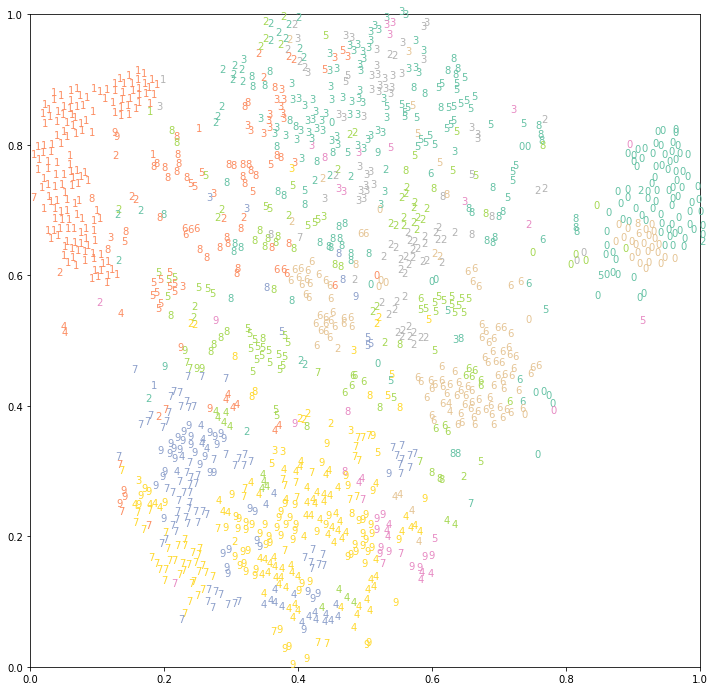

In [110]:
#affichage sur les deux dimensions calculées par tsne, on affiche la valeur des targets réelles

x_min, x_max = np.min(X_tsne, 0), np.max(X_tsne, 0)
Xn = (X_tsne - x_min) / (x_max - x_min)

fig=plt.figure(figsize=(12,12))

for i in range(X.shape[0]):
    plt.text(Xn[i,0], Xn[i,1], # à vous de définir ces dimensions !
            str('%d' % y[i]),  # le point i est représenté par son chiffre
            color=plt.cm.Set2(cluster.labels_[i]/10.)
            )

In [111]:
# le clustering semble contenir beaucoup d'erreurs, le coefficeint de silouhette pouvait le laisser entendre

In [112]:
# pour calcule rle taux de reussite du clustering par rapport aux valeurs réelles
# on cherche pour chaque cluster quelle est la valeur de Y la plus fréquente pour lui attribuer cette valeur 
#On enregistre le resultat dans le dictionnaire target_cluster (cle égale numero de cluster, valeur = target attribuée)

target_cluster={}
for i in range(10):
    maxi=-1
    imax=-1
    score={}
    y2=y[cluster.labels_==i]
    for k in range(y2.shape[0]):
        if y2[k] in score.keys():
            score[y2[k]]+=1
        else:
            score[y2[k]]=1
        
    for j in score.keys():
        if score[j]>maxi:
            maxi=score[j]
            imax=j
            
    target_cluster[i]=imax
    
print(target_cluster)

for i in range(10):
    if i in target_cluster.values():
        print('la valeur %i est ok' % i)
    else:
        print('la valeur %i est manquante' % i)        

{0: 0.0, 1: 3.0, 2: 1.0, 3: 7.0, 4: 9.0, 5: 5.0, 6: 2.0, 7: 4.0, 8: 6.0, 9: 2.0}
la valeur 0 est ok
la valeur 1 est ok
la valeur 2 est ok
la valeur 3 est ok
la valeur 4 est ok
la valeur 5 est ok
la valeur 6 est ok
la valeur 7 est ok
la valeur 8 est manquante
la valeur 9 est ok


In [113]:
# certaines targets ne sont pas attribuée

# applique les targets attribuées aux cluster dans y_predict
y_predict=y
y_predict=[target_cluster[cluster.labels_[i]] for i in range(y.shape[0])]



from sklearn.metrics import accuracy_score

accuracy_score(y, y_predict)


0.51000000000000001

In [ ]:
#on obtient un score tres moyen de 51% de reussite, à rapprocher du coefficient de silouhette faible de 0.011